# STATE NBA PLAYER  SEASON 2023-2024( Linearregression - ANN )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
Rk: Rank
Player: Player's name
Pos: Position
Age: Player's age
Tm: Team
G: Games played
GS: Games started
MP: Minutes played per game
FG: Field goals per game
FGA: Field goal attempts per game
FG%: Field goal percentage
3P: 3-point field goals per game
3PA: 3-point field goal attempts per game
3P%: 3-point field goal percentage
2P: 2-point field goals per game
2PA: 2-point field goal attempts per game
2P%: 2-point field goal percentage
eFG%: Effective field goal percentage
FT: Free throws per game
FTA: Free throw attempts per game
FT%: Free throw percentage
ORB: Offensive rebounds per game
DRB: Defensive rebounds per game
TRB: Total rebounds per game
AST: Assists per game
STL: Steals per game
BLK: Blocks per game
TOV: Turnovers per game
PF: Personal fouls per game
PTS: Points per game
'''

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('nba_csv')

Saving nba_csv to nba_csv


In [5]:
df

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Precious Achiuwa,C,24,TOR,4,0,21.0,2.5,7.3,...,1.000,2.0,5.3,7.3,2.3,0.0,0.3,1.5,2.3,6.0
1,1,Bam Adebayo,C,26,MIA,8,8,34.6,8.3,15.5,...,0.800,2.4,8.0,10.4,3.5,1.0,1.6,3.5,2.5,23.1
2,2,Ochai Agbaji,SG,23,UTA,10,2,16.3,1.7,4.1,...,0.000,0.5,1.7,2.2,1.0,0.2,0.6,0.7,1.3,4.4
3,3,Santi Aldama,PF,23,MEM,3,0,19.7,3.3,8.3,...,0.250,1.0,4.0,5.0,1.0,0.7,0.3,1.0,1.7,8.3
4,4,Nickeil Alexander-Walker,SG,25,MIN,8,2,19.3,1.5,4.5,...,0.333,0.1,2.1,2.3,3.0,0.8,0.9,1.0,1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,459,Thaddeus Young,PF,35,TOR,2,0,3.0,1.0,1.5,...,0.000,0.5,0.5,1.0,1.5,0.0,0.0,0.0,0.0,2.0
460,460,Trae Young,PG,25,ATL,9,9,35.8,6.7,18.7,...,0.899,0.8,2.1,2.9,10.2,1.6,0.0,4.2,1.4,24.4
461,461,Omer Yurtseven,C,25,UTA,6,0,5.2,1.2,1.7,...,0.500,0.5,1.3,1.8,0.5,0.0,0.2,0.2,1.0,2.7
462,462,Cody Zeller,C,31,NOP,6,0,5.8,0.2,1.2,...,0.500,0.8,1.2,2.0,1.0,0.2,0.0,0.0,0.7,0.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 464 entries, 0 to 463

Data columns (total 30 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   Unnamed: 0  464 non-null    int64  

 1   Player      464 non-null    object 

 2   Pos         464 non-null    object 

 3   Age         464 non-null    int64  

 4   Tm          464 non-null    object 

 5   G           464 non-null    int64  

 6   GS          464 non-null    int64  

 7   MP          464 non-null    float64

 8   FG          464 non-null    float64

 9   FGA         464 non-null    float64

 10  FG%         452 non-null    float64

 11  3P          464 non-null    float64

 12  3PA         464 non-null    float64

 13  3P%         398 non-null    float64

 14  2P          464 non-null    float64

 15  2PA         464 non-null    float64

 16  2P%         439 non-null    float64

 17  eFG%        452 non-null    float64

 18  FT          464 non-null    float64

 19  FTA  

In [7]:
df.describe()

,Unnamed: 0,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,452.000000,464.000000,464.000000,...,376.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,231.500000,26.101293,6.247845,2.857759,18.913793,3.164440,6.843750,0.446794,0.950000,2.682974,...,0.747840,0.872629,2.597198,3.467241,1.957759,0.615302,0.413147,1.087069,1.605819,8.613147
std,134.089522,4.456228,2.784754,3.729693,10.735383,2.650059,5.438933,0.174427,0.957656,2.381596,...,0.207253,0.905756,2.038690,2.712559,1.978017,0.531556,0.499567,0.997191,0.995383,7.299521
min,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,23.000000,4.000000,0.000000,9.000000,1.000000,2.400000,0.385000,0.000000,0.575000,...,0.631000,0.275000,1.000000,1.400000,0.500000,0.200000,0.000000,0.400000,0.800000,3.000000
50%,231.500000,25.000000,7.000000,0.000000,19.300000,2.600000,5.400000,0.455000,0.700000,2.200000,...,0.786000,0.600000,2.100000,3.000000,1.300000,0.600000,0.300000,0.900000,1.600000,6.700000
75%,347.250000,29.000000,9.000000,7.000000,28.625000,4.600000,10.000000,0.522250,1.600000,4.200000,...,0.882000,1.200000,3.700000,4.800000,2.825000,1.000000,0.600000,1.500000,2.300000,12.350000
max,463.000000,39.000000,10.000000,10.000000,39.100000,11.900000,23.300000,1.000000,5.700000,12.600000,...,1.000000,6.300000,9.900000,13.100000,11.600000,2.400000,3.000000,5.600000,4.200000,32.900000


In [8]:
df.agg([max,min])

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
max,463,Zion Williamson,SG,39,WAS,10,10,39.1,11.9,23.3,...,1.0,6.3,9.9,13.1,11.6,2.4,3.0,5.6,4.2,32.9
min,0,A.J. Green,C,19,ATL,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### creat  DataFrame  top  10  in  some  feature

In [9]:
top_ft_shooters = df[df['FTA'] > 2][['Player', 'FT%']].sort_values(by='FT%', ascending=False).head(10)
top_3pt_shooters = df[df['3PA'] > 2.5][['Player', '3P%']].sort_values(by='3P%', ascending=False).head(10)
top_fg_shooters = df[df['FGA'] > 6][['Player', 'FG%']].sort_values(by='FG%', ascending=False).head(10)
top_Minutes_playeder = df[['Player', 'MP']].sort_values(by='MP', ascending=False).head(10)
top_fouls_per_game = df[['Player', 'PF']].sort_values(by='PF', ascending=False).head(10)
top_player_age = df[['Player', 'Age']].sort_values(by='Age', ascending=False).head(10)
top_assists = df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(10)
top_Points = df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(10)
top_stealers = df[['Player', 'STL']].sort_values(by='STL', ascending=False).head(10)
top_blockers = df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(10)
top_rebounders = df[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(10)

Selection Two way top 10 features

In [ ]:
'''
top_Points = df.sort_values('PTS', ascending=False).iloc[0:10,:])
top_Points = df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(10)
'''

# Creat DataFrame with above cell top_10

In [10]:
New_DataFrame_top10_players = {
    'Top FT% Shooters': top_ft_shooters,
    'Top 3P% Shooters': top_3pt_shooters,
    'Top FG% Shooters': top_fg_shooters,
    'top Minutes': top_Minutes_playeder,
    'top fouls': top_fouls_per_game,
    'top age': top_player_age,
    'Top in Assists': top_assists,
    'top Points': top_Points,
    'Top Stealers': top_stealers,
    'Top Blockers': top_blockers,
    'Top Rebounders': top_rebounders
}

# 11 plot top performers in feature categorical

<ipython-input-11-1c260891ab9a>:5: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x='FT%', y='Player', data=top_ft_shooters, palette='coolwarm')

<ipython-input-11-1c260891ab9a>:10: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x='3P%', y='Player', data=top_3pt_shooters, palette='rocket')

<ipython-input-11-1c260891ab9a>:15: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x='FG%', y='Player', data=top_fg_shooters, palette='spring')

<ipython-input-11-1c260891ab9a>:20: FutureWarning: 



Passing `palette` without assigning `hue` is d

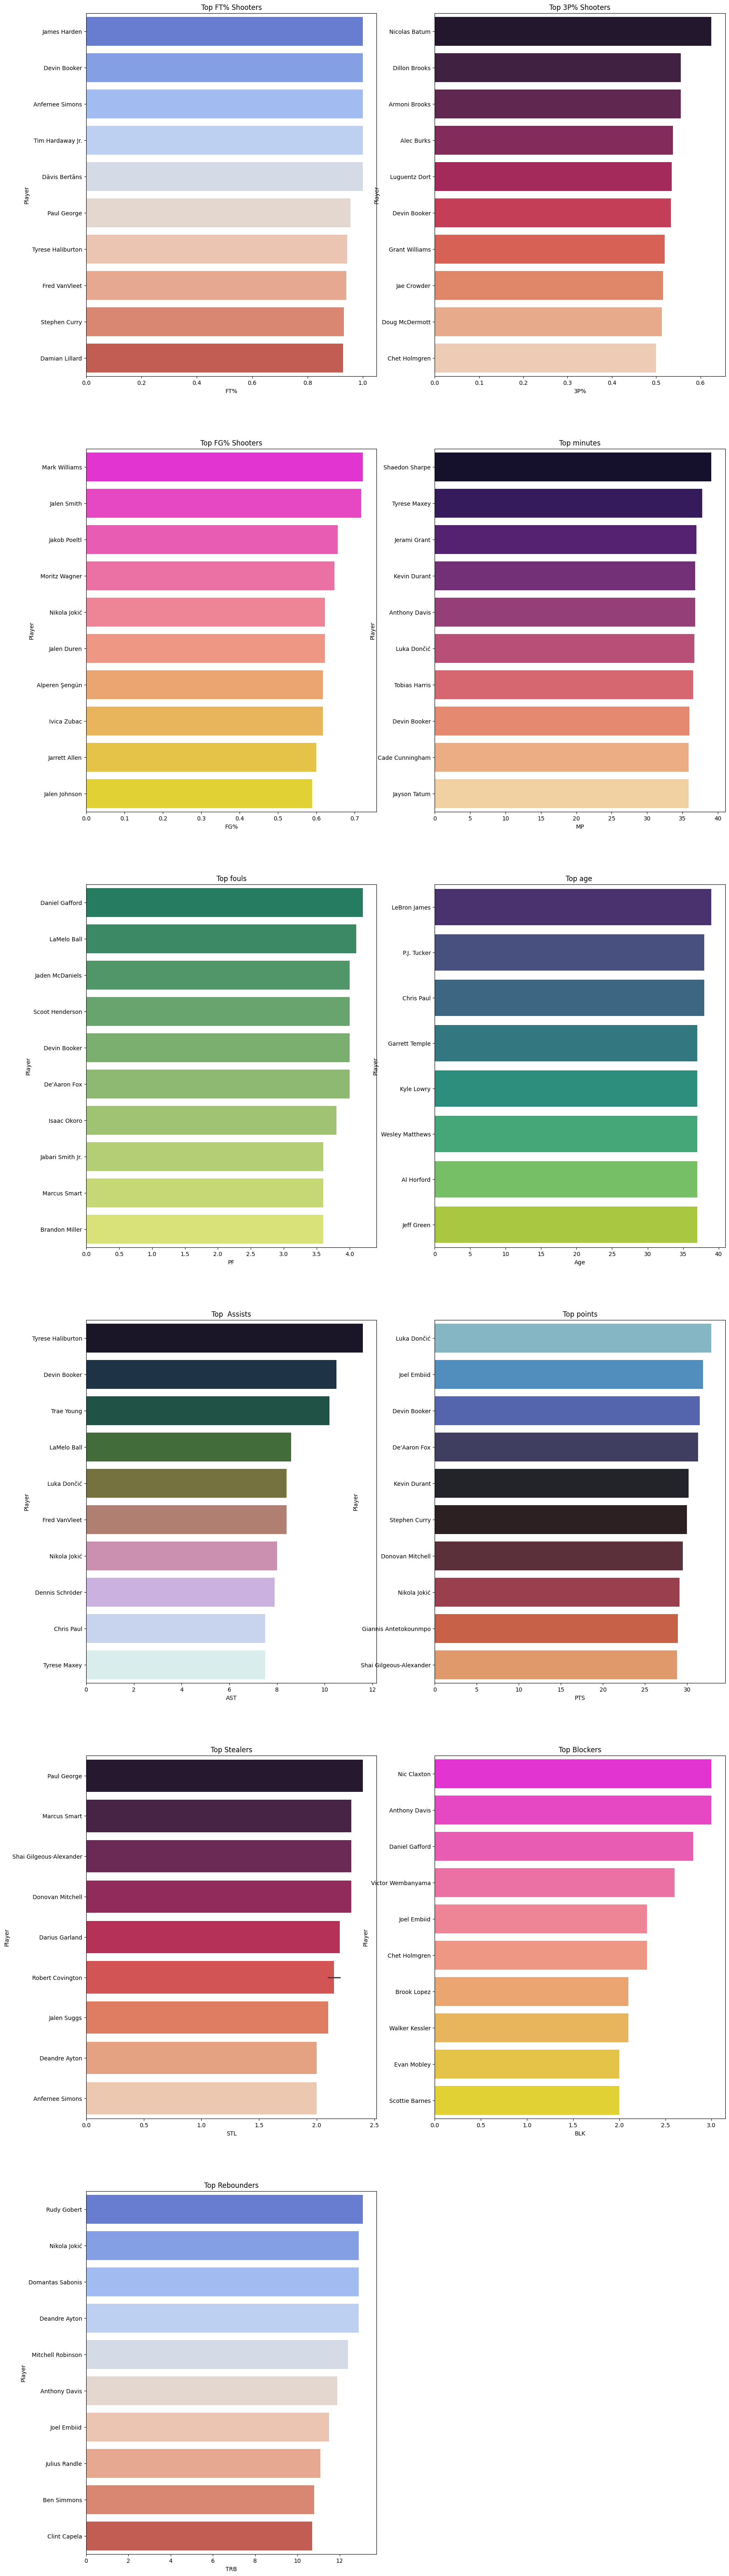

In [11]:
sns.light_palette("seagreen")
plt.figure(figsize=(20,80))

plt.subplot(6, 2, 1)
sns.barplot(x='FT%', y='Player', data=top_ft_shooters, palette='coolwarm')
plt.title('Top FT% Shooters')


plt.subplot(6, 2, 2)
sns.barplot(x='3P%', y='Player', data=top_3pt_shooters, palette='rocket')
plt.title('Top 3P% Shooters')


plt.subplot(6, 2, 3)
sns.barplot(x='FG%', y='Player', data=top_fg_shooters, palette='spring')
plt.title('Top FG% Shooters')


plt.subplot(6, 2, 4)
sns.barplot(x='MP', y='Player', data=top_Minutes_playeder, palette='magma')
plt.title('Top minutes')


plt.subplot(6, 2, 5)
sns.barplot(x='PF', y='Player', data=top_fouls_per_game, palette='summer')
plt.title('Top fouls')


plt.subplot(6, 2, 6)
sns.barplot(x='Age', y='Player', data=top_player_age, palette='viridis')
plt.title('Top age ')


plt.subplot(6, 2, 7)
sns.barplot(x='AST', y='Player', data=top_assists, palette='cubehelix')
plt.title('Top  Assists')


plt.subplot(6, 2, 8)
sns.barplot(x='PTS', y='Player', data=top_Points, palette='icefire')
plt.title('Top points')


plt.subplot(6, 2, 9)
sns.barplot(x='STL', y='Player', data=top_stealers, palette='rocket')
plt.title('Top Stealers')


plt.subplot(6, 2, 10)
sns.barplot(x='BLK', y='Player', data=top_blockers, palette='spring')
plt.title('Top Blockers')


plt.subplot(6, 2, 11)
sns.barplot(x='TRB', y='Player', data=top_rebounders, palette='coolwarm')
plt.title('Top Rebounders')


plt.show()

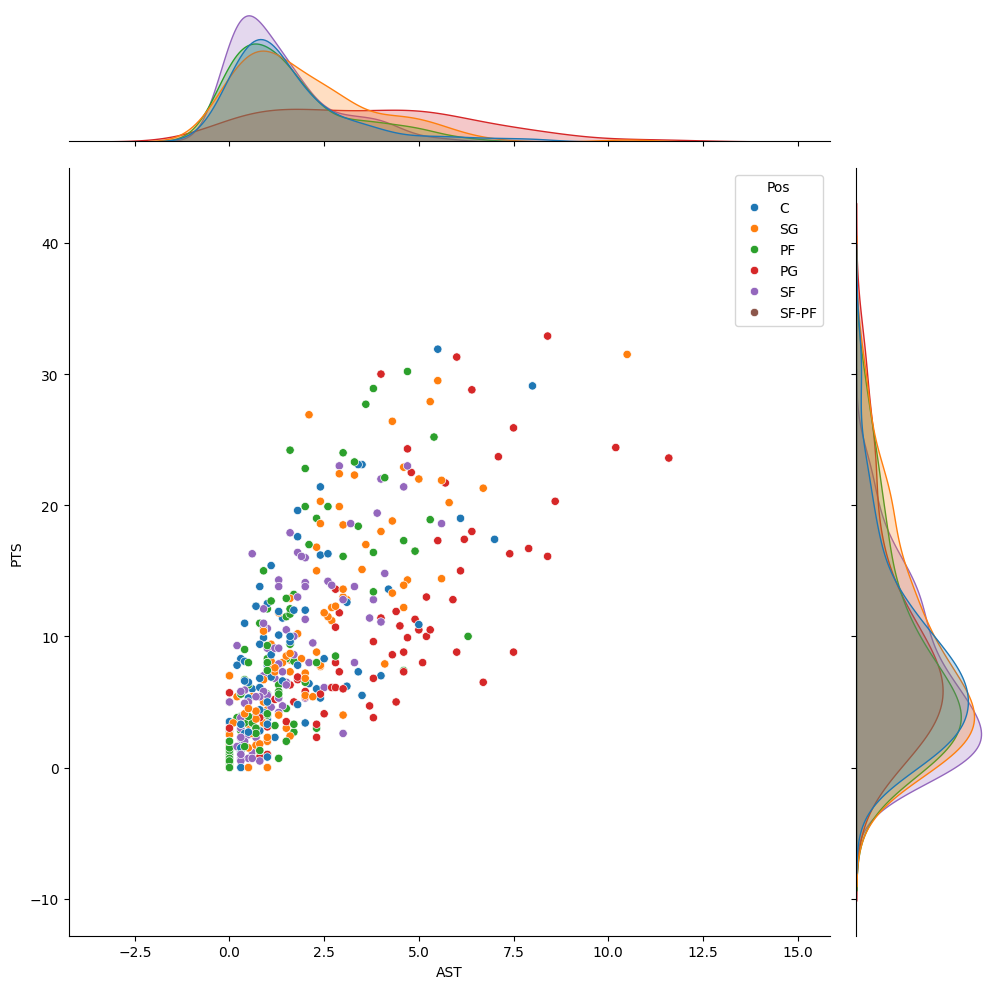

In [12]:
sns.jointplot(y='PTS', x='AST', data=df, hue="Pos" , kind='scatter' , height=10 )

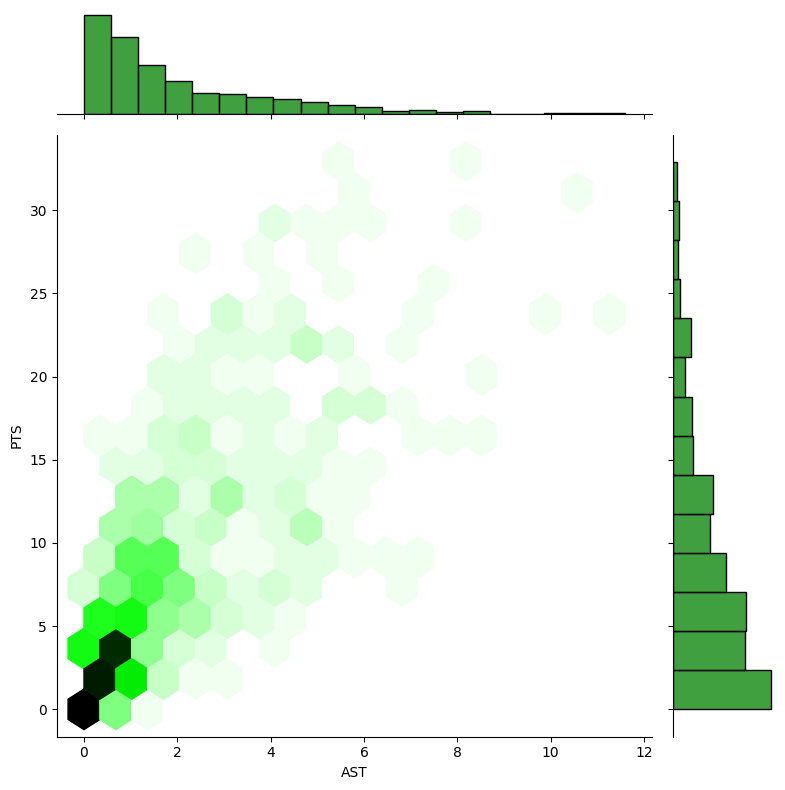

In [13]:
sns.jointplot(y='PTS', x='AST', data=df, kind='hex' , height=8 , color='g')

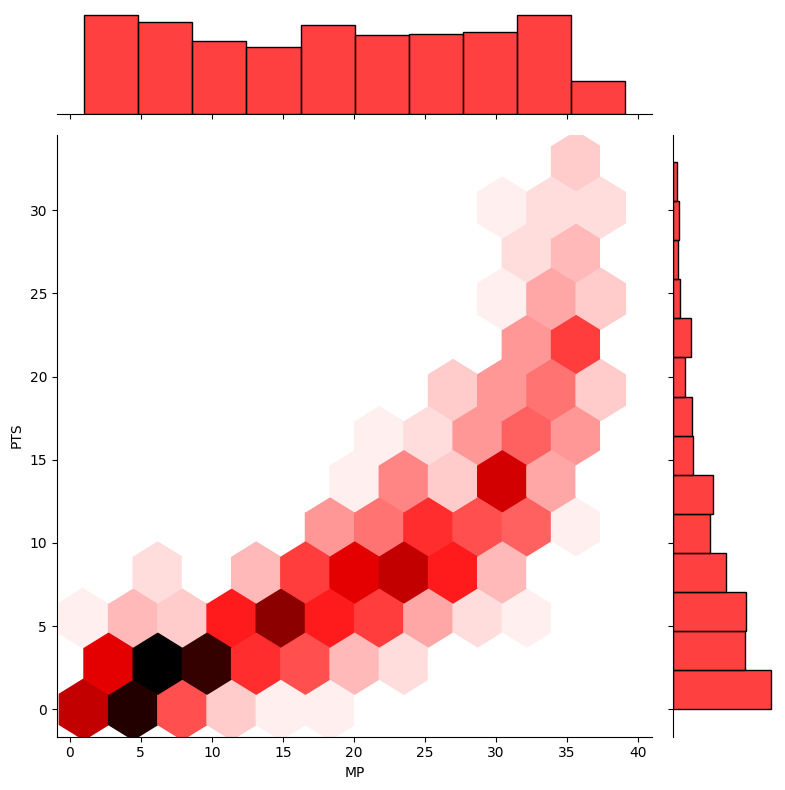

In [14]:
sns.jointplot( x='MP', y='PTS' , data=df, kind='hex' , height=8 , color='red')

In [15]:
Tm_col =['DAL', 'PHI', 'PHO', 'SAC', 'GSW', 'CLE', 'DEN', 'MIL', 'OKC', 'MIN','BOS',
      'BRK','MEM', 'LAL','ATL', 'UTA', 'WAS', 'DET', 'IND', 'LAC','MIA', 'NOP',
      'POR', 'NYK','CHI', 'CHO', 'HOU', 'TOR', 'SAS', 'ORL','TOT']

<ipython-input-16-49512c5f8cd5>:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot( x='Tm' , y='PTS' , data=df_team_max_point , palette='summer')


Text(0, 0.5, 'PTS_MAX')

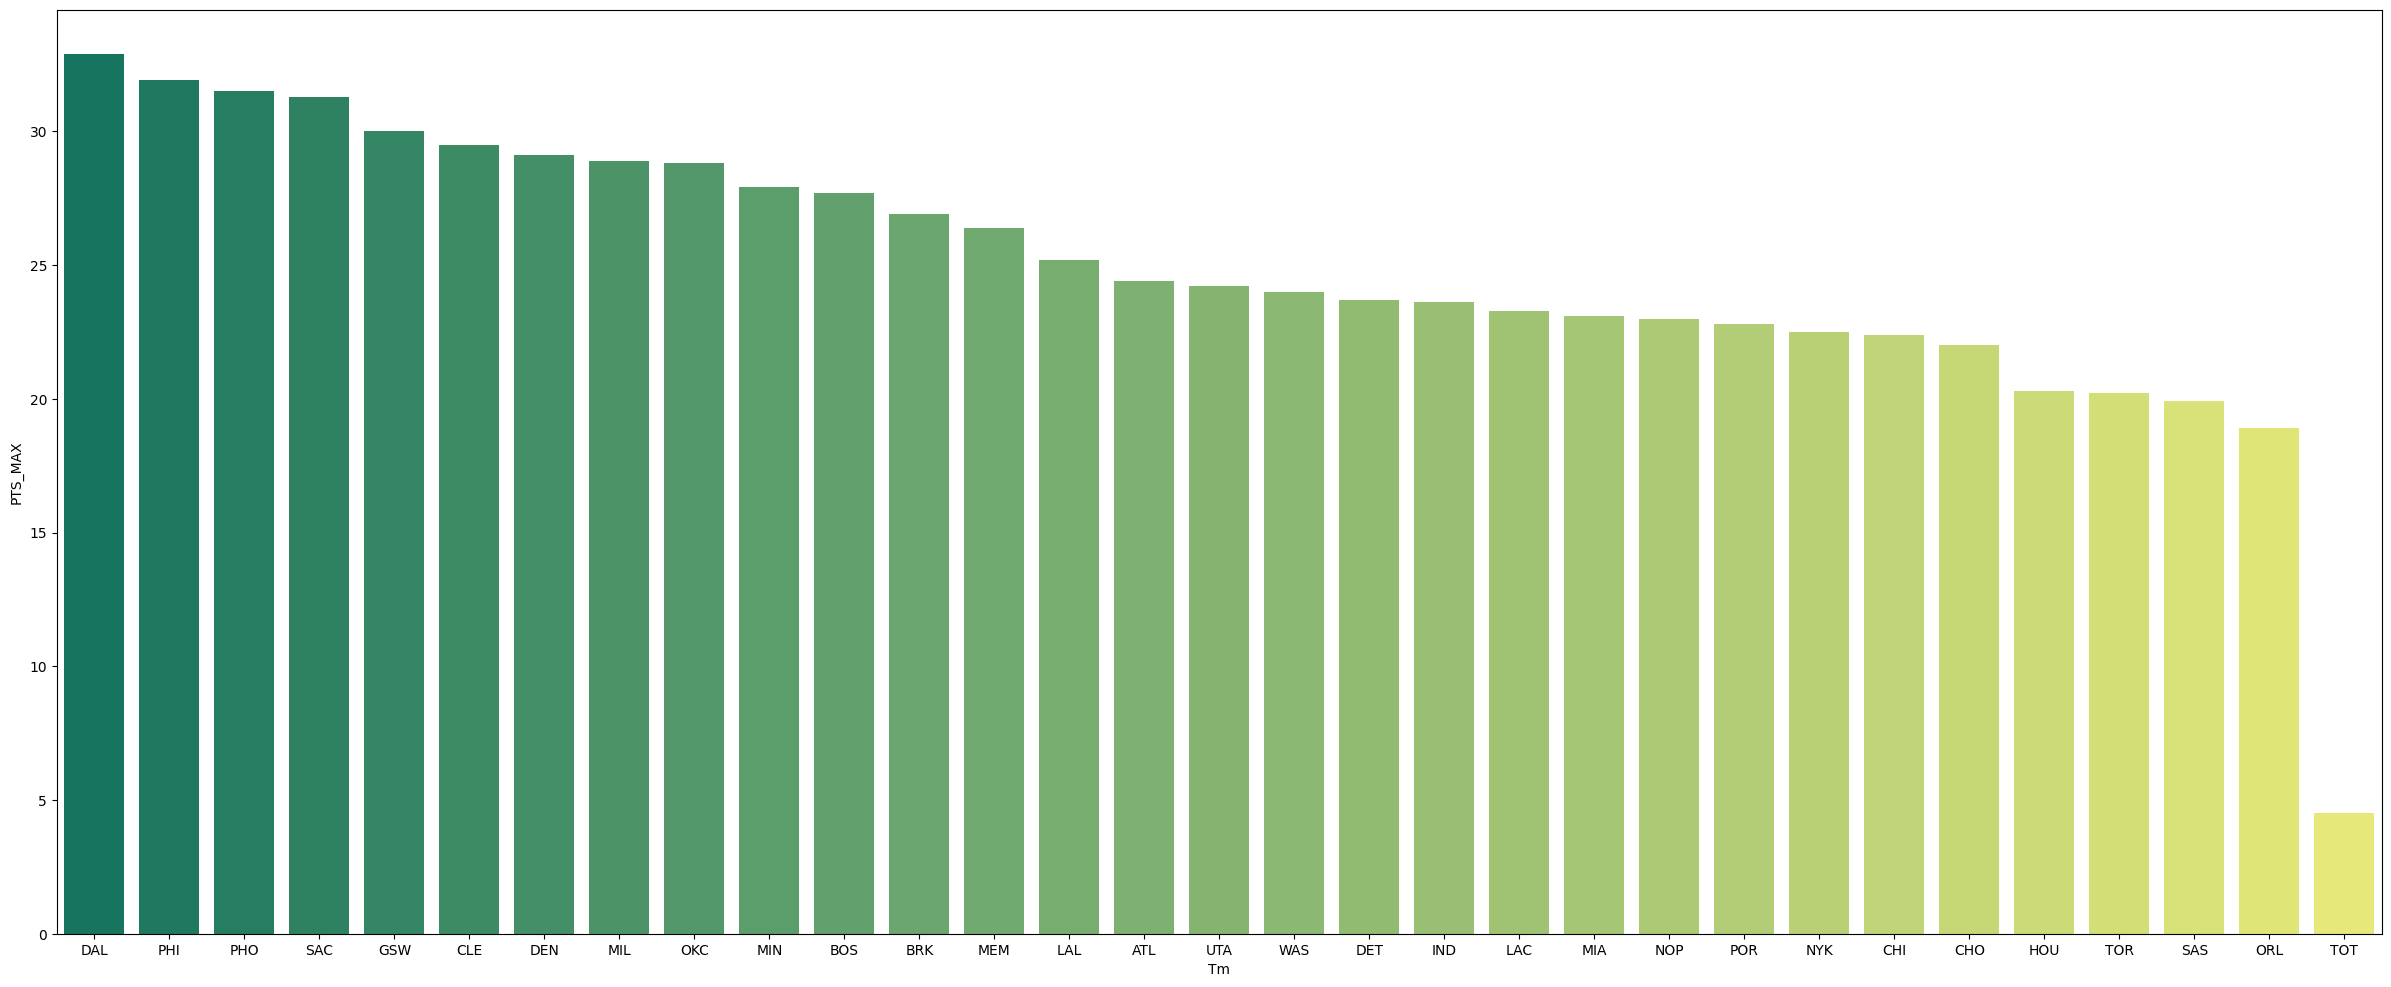

In [16]:
df_team_max_point = df.groupby('Tm').agg({'PTS':max}).sort_values(by='PTS' , ascending=False)
df_team_max_point['Tm'] = Tm_col
df_team_max_point.reset_index(drop=True , inplace=True)
df_team_max_point

plt.figure(figsize=(30,12))
sns.barplot( x='Tm' , y='PTS' , data=df_team_max_point , palette='summer')
plt.ylabel('PTS_MAX')

<ipython-input-18-51e2e4a7373c>:7: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot( x='Tm' , y='PF' , data=df_team_max_foul , palette='gist_ncar')


<Axes: xlabel='Tm', ylabel='PF'>

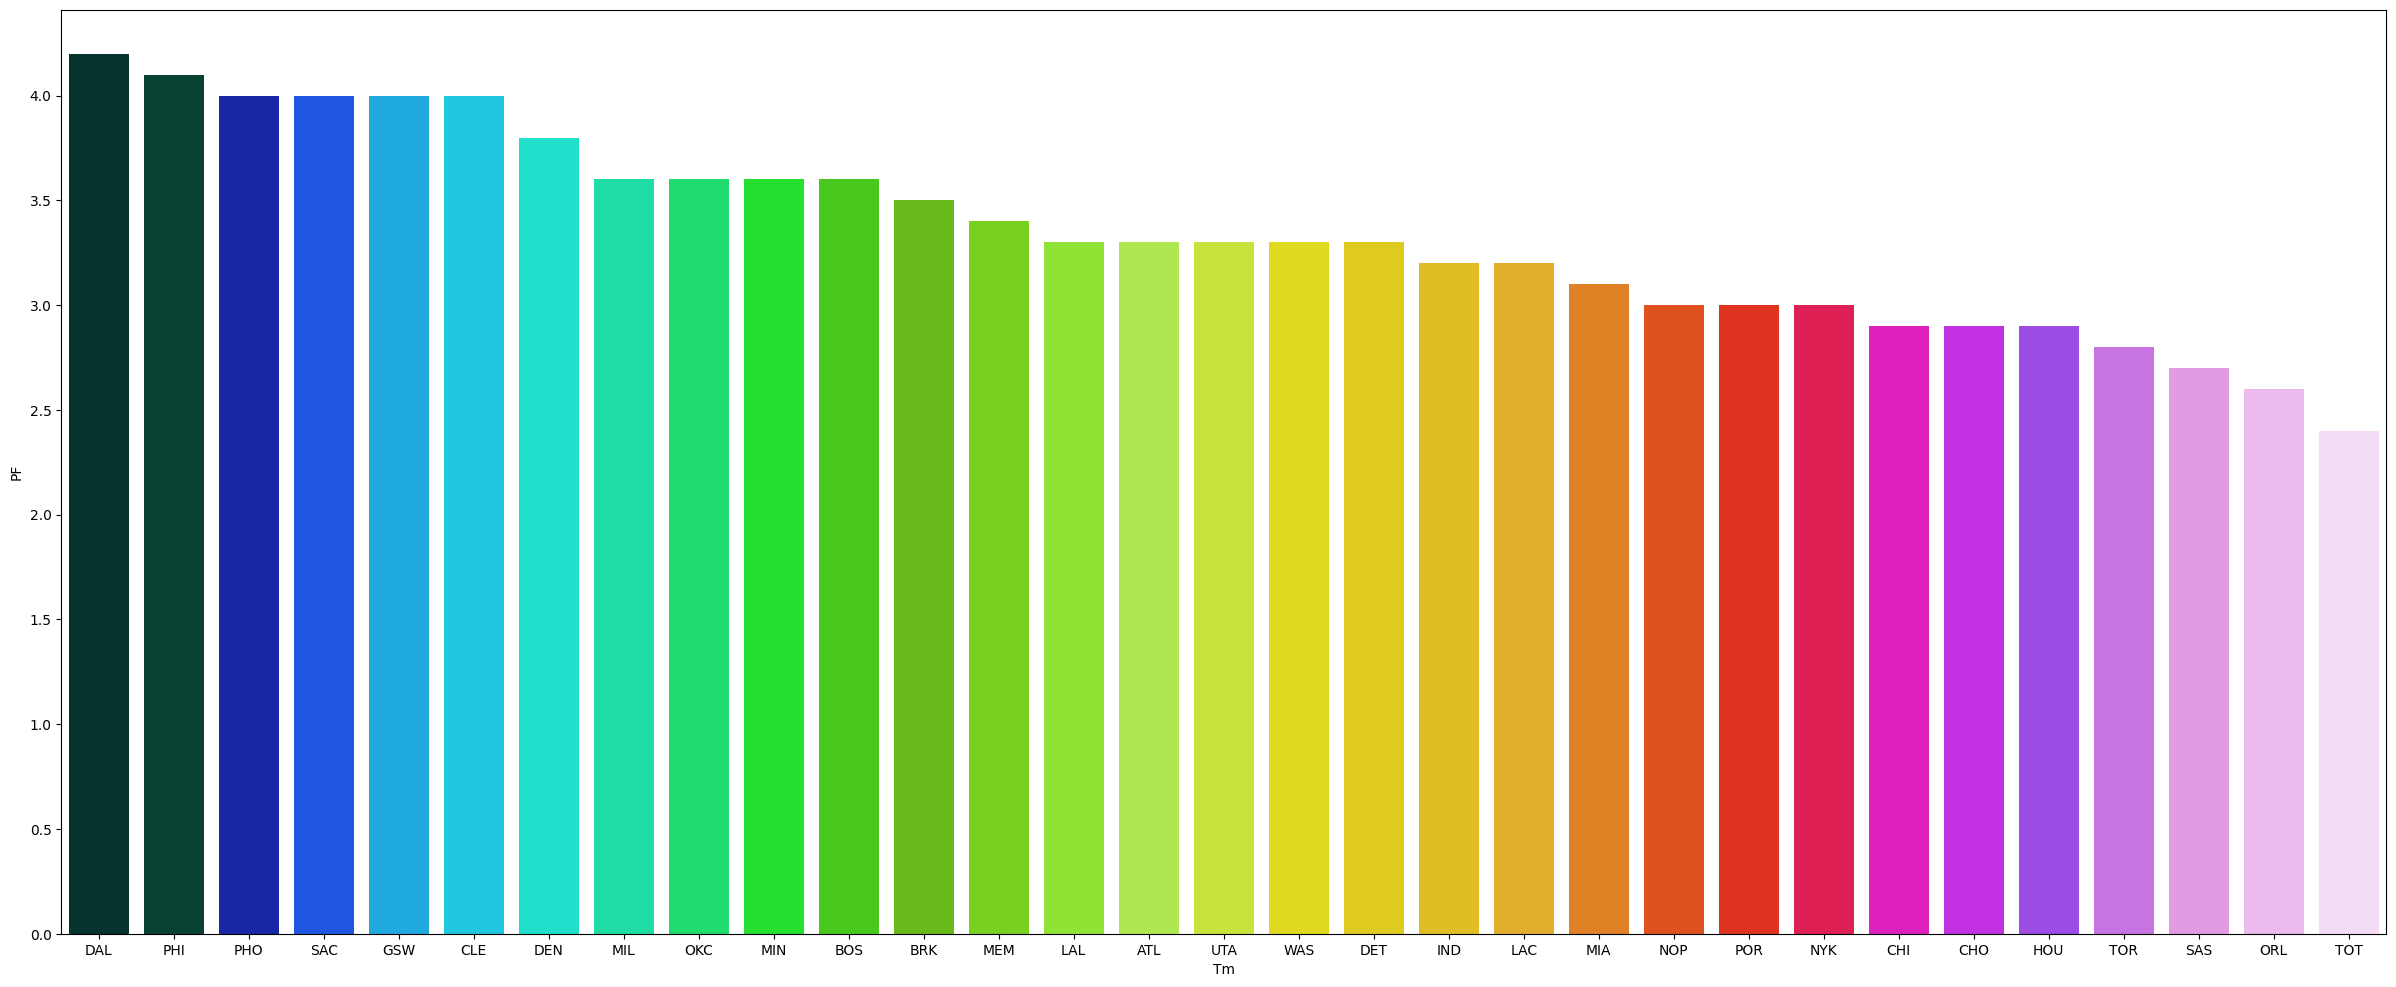

In [18]:
df_team_max_foul = df.groupby('Tm').agg({'PF':max}).sort_values(by='PF' , ascending=False)
df_team_max_foul['Tm'] = Tm_col
df_team_max_foul.reset_index(drop=True , inplace=True)
df_team_max_foul

plt.figure(figsize=(30,12))
sns.barplot( x='Tm' , y='PF' , data=df_team_max_foul , palette='gist_ncar')

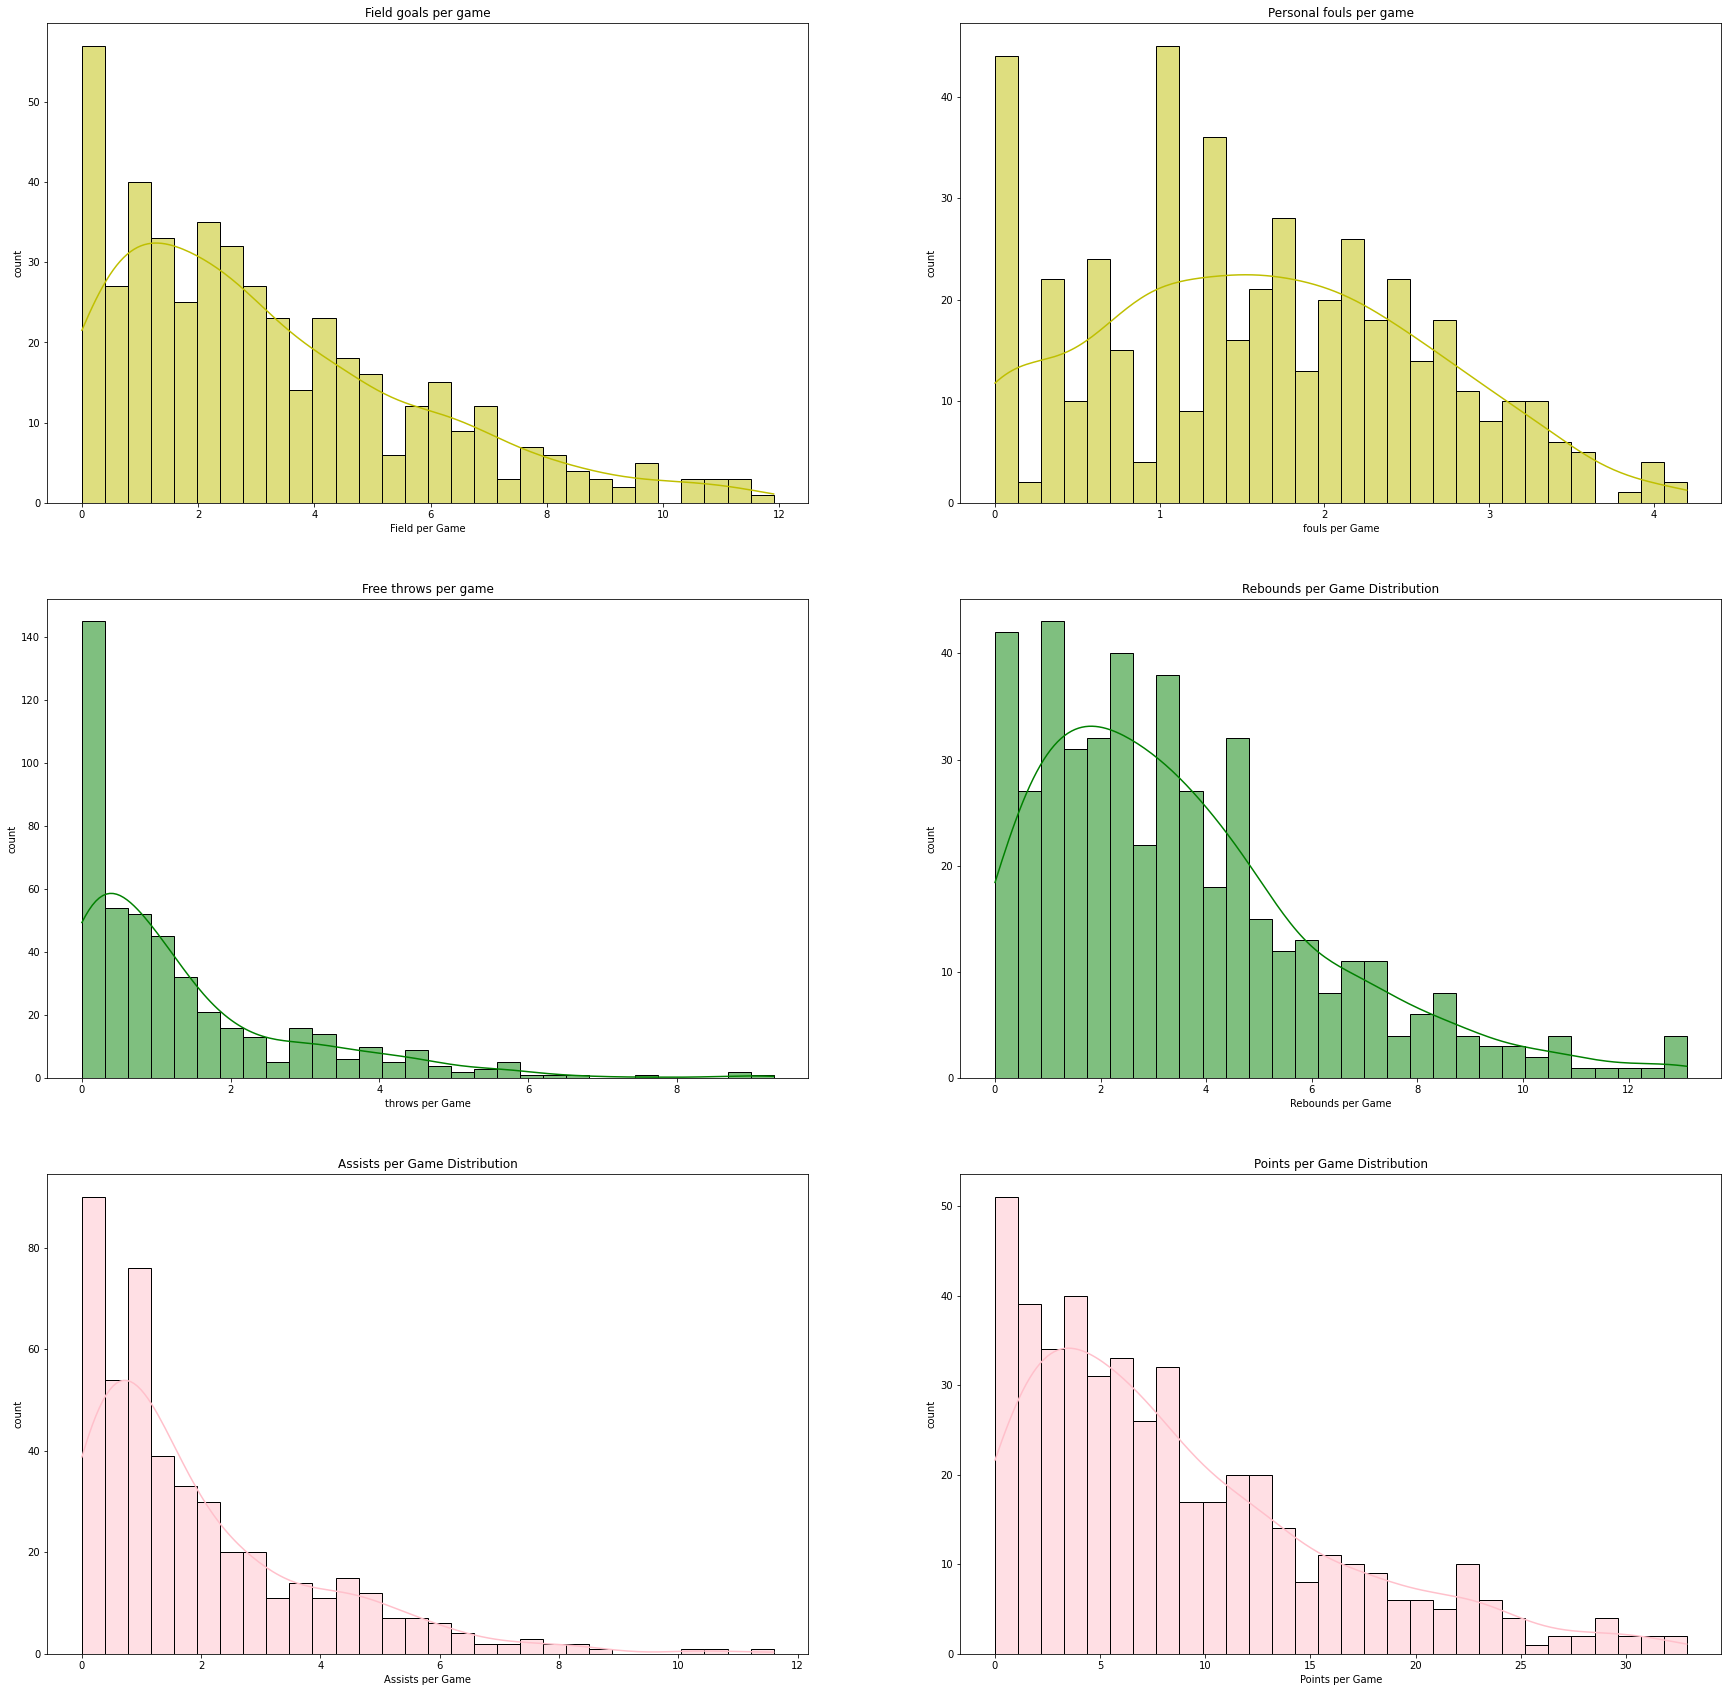

In [ ]:
plt.figure(figsize=(30, 30))


plt.subplot(3, 2, 1)
sns.histplot(df['FG'] , bins=30 , kde=True, color='y')
plt.title('Field goals per game')
plt.xlabel('Field per Game')
plt.ylabel('count')


plt.subplot(3, 2, 2)
sns.histplot(df['PF'] , bins=30 ,kde=True, color='y')
plt.title('Personal fouls per game')
plt.xlabel('fouls per Game')
plt.ylabel('count')


plt.subplot(3, 2, 3)
sns.histplot(df['FT'] , bins=30 , kde=True, color='g')
plt.title('Free throws per game')
plt.xlabel('throws per Game')
plt.ylabel('count')


plt.subplot(3, 2, 4)
sns.histplot(df['TRB'] , bins=30 , kde=True , color='g')
plt.title('Rebounds per Game Distribution')
plt.xlabel('Rebounds per Game')
plt.ylabel('count')


plt.subplot(3, 2, 5)
sns.histplot(df['AST'] , bins=30 , kde=True , color='pink')
plt.title('Assists per Game Distribution')
plt.xlabel('Assists per Game')
plt.ylabel('count')


plt.subplot(3, 2, 6)
sns.histplot(df['PTS'] , bins=30 , kde=True, color='pink')
plt.title('Points per Game Distribution')
plt.xlabel('Points per Game')
plt.ylabel('count')

plt.show()

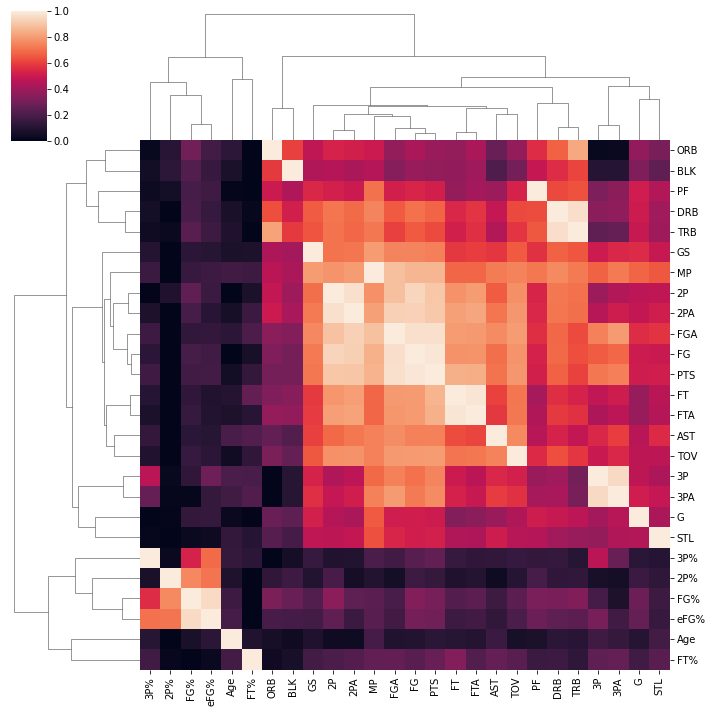

In [ ]:
sns.clustermap( df.corr() , standard_scale=2 )

<AxesSubplot:>

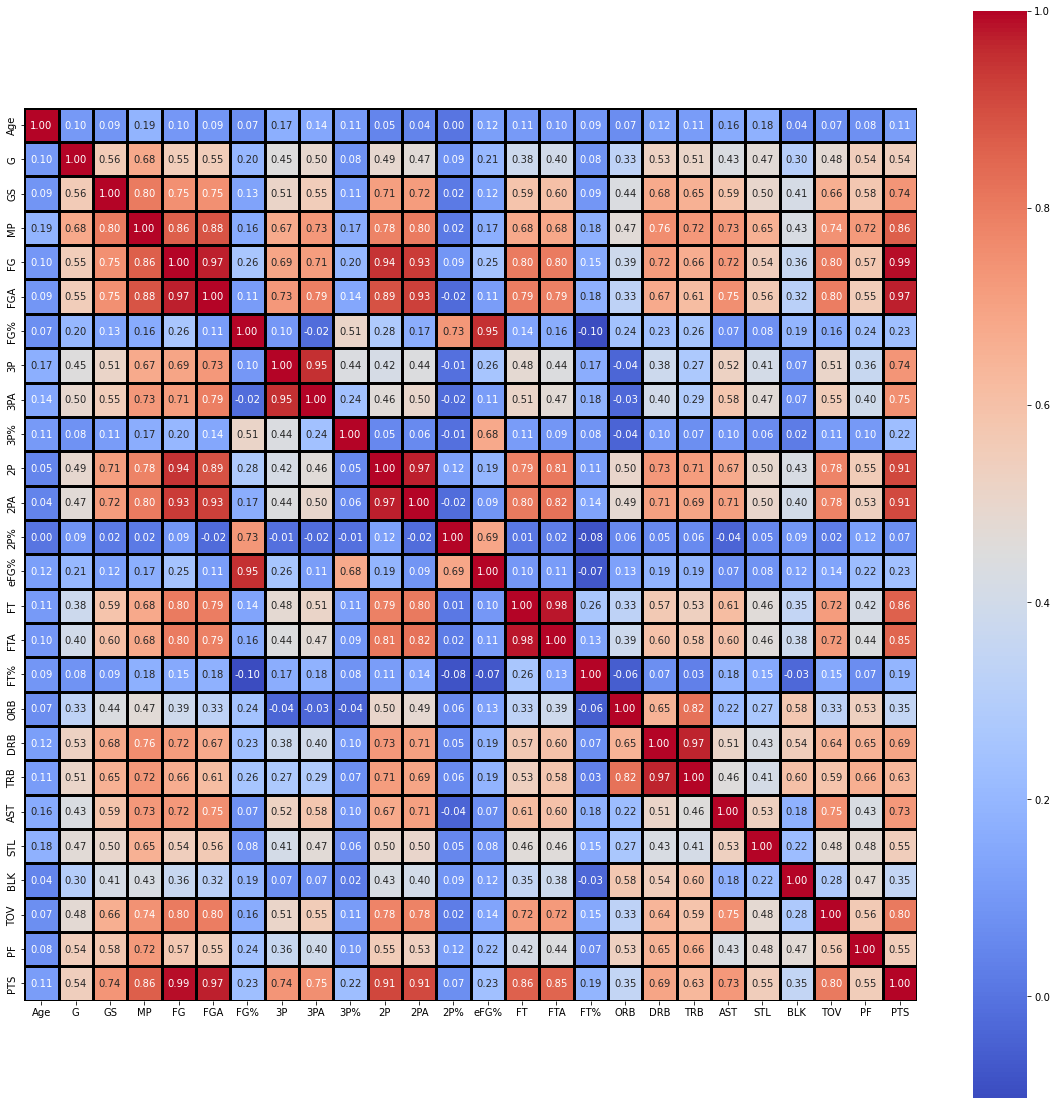

In [ ]:
# corrolation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , cmap='coolwarm' , linewidths=3 , linecolor='black' , cbar=True , annot=True , fmt=".2f" , square=True)

# Data cleaning

In [20]:
df_new_standard = df[['G','GS','MP','FG','FG%','3PA','3P%','FT','FT%','ORB','DRB','TRB','AST','BLK','STL','PF','TOV','PTS']]
df_new_standard

,G,GS,MP,FG,FG%,3PA,3P%,FT,FT%,ORB,DRB,TRB,AST,BLK,STL,PF,TOV,PTS
0,4,0,21.0,2.5,0.345,1.8,0.143,0.8,1.000,2.0,5.3,7.3,2.3,0.3,0.0,2.3,1.5,6.0
1,8,8,34.6,8.3,0.532,0.3,0.500,6.5,0.800,2.4,8.0,10.4,3.5,1.6,1.0,2.5,3.5,23.1
2,10,2,16.3,1.7,0.415,2.7,0.370,0.0,0.000,0.5,1.7,2.2,1.0,0.6,0.2,1.3,0.7,4.4
3,3,0,19.7,3.3,0.400,2.7,0.500,0.3,0.250,1.0,4.0,5.0,1.0,0.3,0.7,1.7,1.0,8.3
4,8,2,19.3,1.5,0.333,2.6,0.286,0.3,0.333,0.1,2.1,2.3,3.0,0.9,0.8,1.5,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2,0,3.0,1.0,0.667,0.0,NaN,0.0,0.000,0.5,0.5,1.0,1.5,0.0,0.0,0.0,0.0,2.0
460,9,9,35.8,6.7,0.357,7.6,0.294,8.9,0.899,0.8,2.1,2.9,10.2,0.0,1.6,1.4,4.2,24.4
461,6,0,5.2,1.2,0.700,0.5,0.333,0.2,0.500,0.5,1.3,1.8,0.5,0.2,0.0,1.0,0.2,2.7
462,6,0,5.8,0.2,0.143,0.0,NaN,0.5,0.500,0.8,1.2,2.0,1.0,0.0,0.2,0.7,0.0,0.8


In [21]:
df_new_standard.isnull()

,G,GS,MP,FG,FG%,3PA,3P%,FT,FT%,ORB,DRB,TRB,AST,BLK,STL,PF,TOV,PTS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
461,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
462,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df_new_standard.isnull().sum()

G       0
GS      0
MP      0
FG      0
FG%    12
3PA     0
3P%    66
FT      0
FT%    88
ORB     0
DRB     0
TRB     0
AST     0
BLK     0
STL     0
PF      0
TOV     0
PTS     0
dtype: int64

<Axes: >

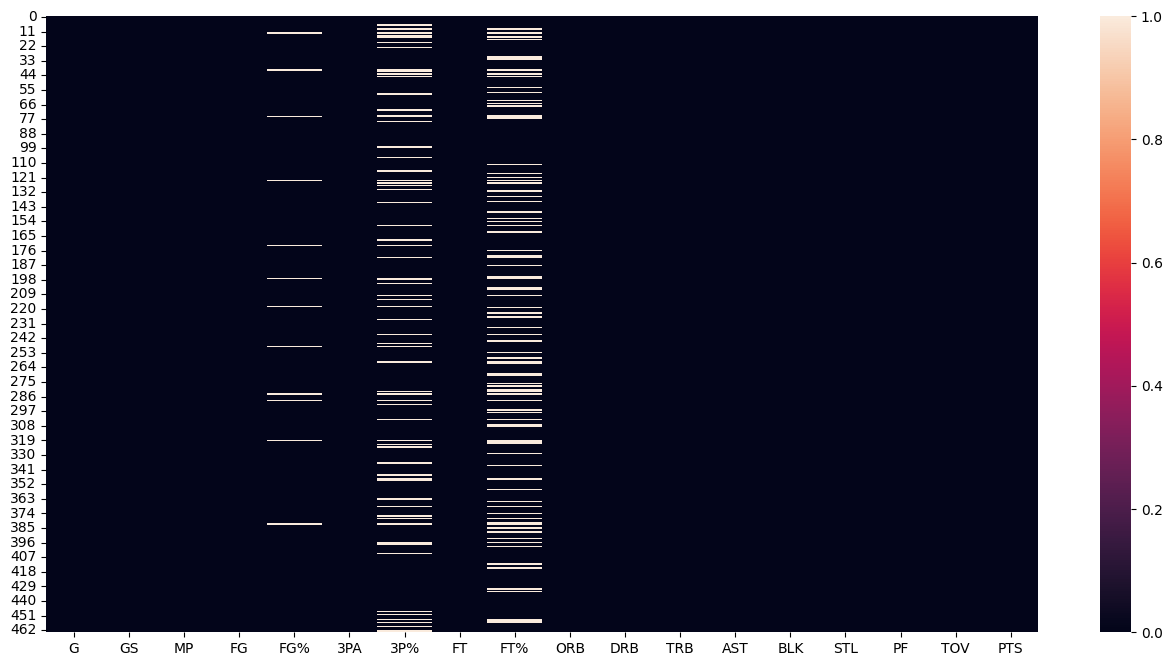

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(df_new_standard.isnull())

In [24]:
df_new_standard = df_new_standard.dropna()
df_new_standard

,G,GS,MP,FG,FG%,3PA,3P%,FT,FT%,ORB,DRB,TRB,AST,BLK,STL,PF,TOV,PTS
0,4,0,21.0,2.5,0.345,1.8,0.143,0.8,1.000,2.0,5.3,7.3,2.3,0.3,0.0,2.3,1.5,6.0
1,8,8,34.6,8.3,0.532,0.3,0.500,6.5,0.800,2.4,8.0,10.4,3.5,1.6,1.0,2.5,3.5,23.1
2,10,2,16.3,1.7,0.415,2.7,0.370,0.0,0.000,0.5,1.7,2.2,1.0,0.6,0.2,1.3,0.7,4.4
3,3,0,19.7,3.3,0.400,2.7,0.500,0.3,0.250,1.0,4.0,5.0,1.0,0.3,0.7,1.7,1.0,8.3
4,8,2,19.3,1.5,0.333,2.6,0.286,0.3,0.333,0.1,2.1,2.3,3.0,0.9,0.8,1.5,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,7,7,32.1,8.9,0.504,0.1,0.000,4.4,0.633,3.1,4.0,7.1,4.1,0.1,0.7,2.7,2.4,22.1
457,9,1,22.8,2.6,0.479,2.8,0.440,1.1,0.588,1.0,5.7,6.7,1.0,0.8,0.3,2.0,1.3,7.4
458,8,0,17.6,1.4,0.367,1.4,0.364,1.8,0.875,0.4,2.1,2.5,4.4,0.1,1.6,0.8,0.5,5.0
460,9,9,35.8,6.7,0.357,7.6,0.294,8.9,0.899,0.8,2.1,2.9,10.2,0.0,1.6,1.4,4.2,24.4


<Axes: >

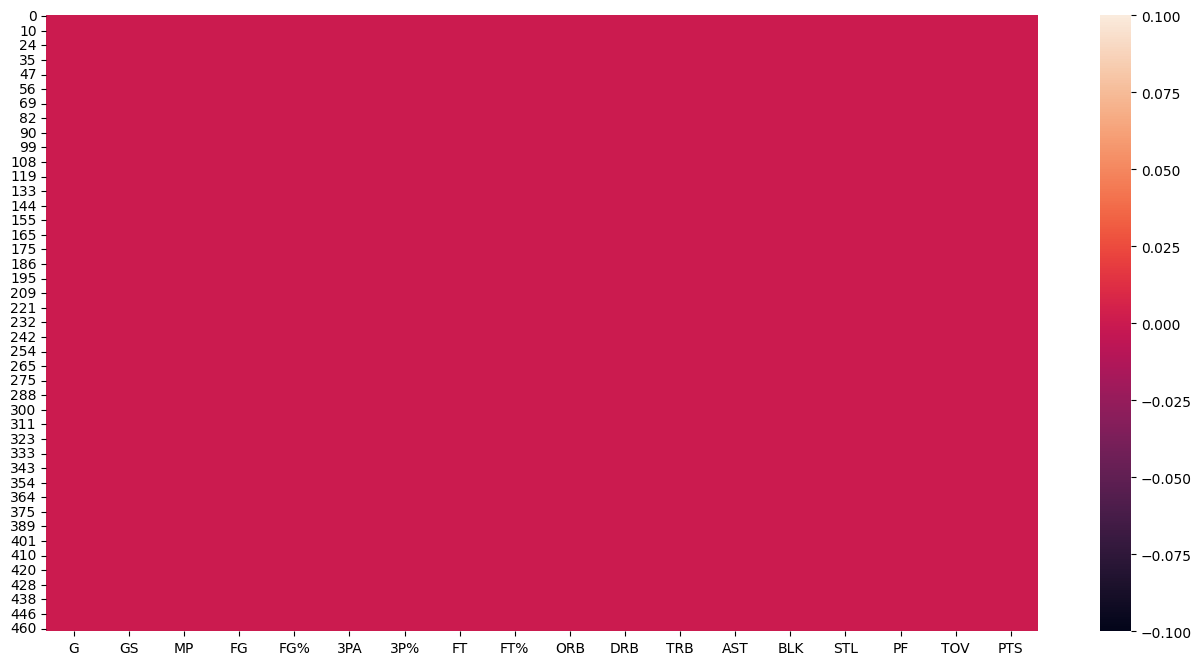

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df_new_standard.isnull())

# Building a Logestic regression

In [26]:
# 3 Method for creat  X,y

# X = df_new_standard.iloc[ : , 0:17]
# y = df_new_standard.iloc[ : , 17:18]

# X = df_new_standard.drop('PTS',axis=1)
# y = df_new_standard['PTS']

# X = df[['G' ,'GS','MP' ,'FG','FG%','3PA','3P%','FT','FT%','ORB','DRB','TRB','AST','BLK','STL','PF','TOV']]
# y = df['PTS']

X = df_new_standard.drop('PTS',axis=1)
y = df_new_standard['PTS']

# Train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Creat model_1 ( Linearregression )

In [ ]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

### Predict

In [ ]:
pred_model = model_linear.predict(X_test)

In [ ]:
# predictions
pred_model

array([18.87481819, 13.67977894,  4.99880777,  7.86102475,  7.70556027,
       18.71758325,  0.09523225,  6.29053137, 18.43022657, 28.79566249,
        1.35427254,  5.86587553, 13.47809359, 31.3477848 ,  3.28120247,
       16.28313475, 18.8450248 , 11.68123201,  4.04009869,  1.73260852,
        3.59389601,  1.93767216,  8.05411619, 12.05529799, 10.48740387,
        3.12875019,  6.30213184,  8.30435333,  4.11325459, 20.38470482,
       21.86628856, 17.43227656,  1.62109428,  5.88012049, 12.01324811,
        5.30422594,  5.89080103,  9.32942234, 29.92736714, 10.51274737,
       11.90998881,  3.27395453,  5.17447263,  1.85591305,  5.5576282 ,
        2.28161675,  7.85262766, 11.43393675,  8.96323474, 23.82392751,
        9.90733605,  9.0217254 , 13.80280521, 13.86540772,  3.32304371,
        3.31761208,  5.63310867,  6.94367742,  8.00232214,  6.67162458,
        0.99451108, 10.95154526,  5.3883965 ,  8.75730451,  4.18610298,
        5.54321324,  1.563905  , 16.43382482])

In [ ]:
# label
y_test

237    18.8
54     14.1
335     4.7
90      8.1
250     8.0
       ... 
216     8.8
342     4.4
96      5.4
144     2.0
428    16.8
Name: PTS, Length: 68, dtype: float64

In [ ]:
df_feat = pd.DataFrame({ 'prediction' : pred_model , 'label' : y_test})
df_feat

,prediction,label
237,18.874818,18.8
54,13.679779,14.1
335,4.998808,4.7
90,7.861025,8.1
250,7.705560,8.0
...,...,...
216,8.757305,8.8
342,4.186103,4.4
96,5.543213,5.4
144,1.563905,2.0


### Evalution

In [ ]:
model_linear.score(X_test,y_test)

0.9994932999200121

In [ ]:
from sklearn import metrics
print('MAE : ' , metrics.mean_absolute_error(y_test,pred_model))
print('MSE : ' , metrics.mean_squared_error(y_test,pred_model))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,pred_model)))

MAE :  0.1211793452336343

MSE :  0.025704456735914788

RMSE :  0.16032609499365594


Text(0, 0.5, 'label')

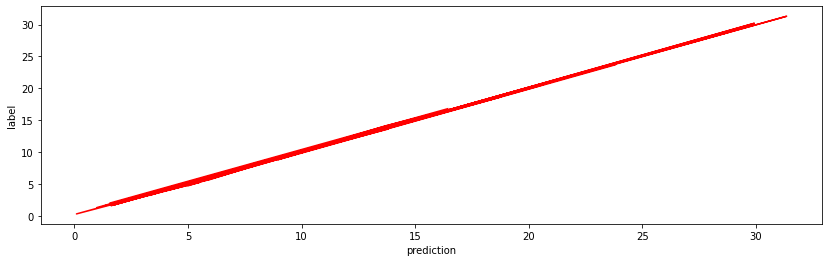

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(df_feat['prediction'],df_feat['label'] ,c='red')
plt.xlabel('prediction')
plt.ylabel('label')

# Conclusion

In [ ]:
model_linear.coef_

array([-0.00716332, -0.0034543 , -0.00866119,  2.02179434,  0.72409873,
        0.40239732,  1.09259105,  0.98588441,  0.01556986, -0.41571663,
       -0.43385507,  0.44461296, -0.00323515, -0.01262321, -0.05054848,
       -0.01098961, -0.02728432])

In [ ]:
coeffecients = pd.DataFrame(model_linear.coef_,X.columns)
coeffecients.columns = ['Coeffecients_col']
coeffecients

,Coeffecients_col
G,-0.007163
GS,-0.003454
MP,-0.008661
FG,2.021794
FG%,0.724099
3PA,0.402397
3P%,1.092591
FT,0.985884
FT%,0.015570
ORB,-0.415717


In [ ]:
coef_sort_df = coeffecients.sort_values('Coeffecients_col' , ascending=False)
coef_sort_df

,Coeffecients_col
FG,2.021794
3P%,1.092591
FT,0.985884
FG%,0.724099
TRB,0.444613
3PA,0.402397
FT%,0.015570
AST,-0.003235
GS,-0.003454
G,-0.007163


<AxesSubplot:xlabel='Coeffecients_col'>

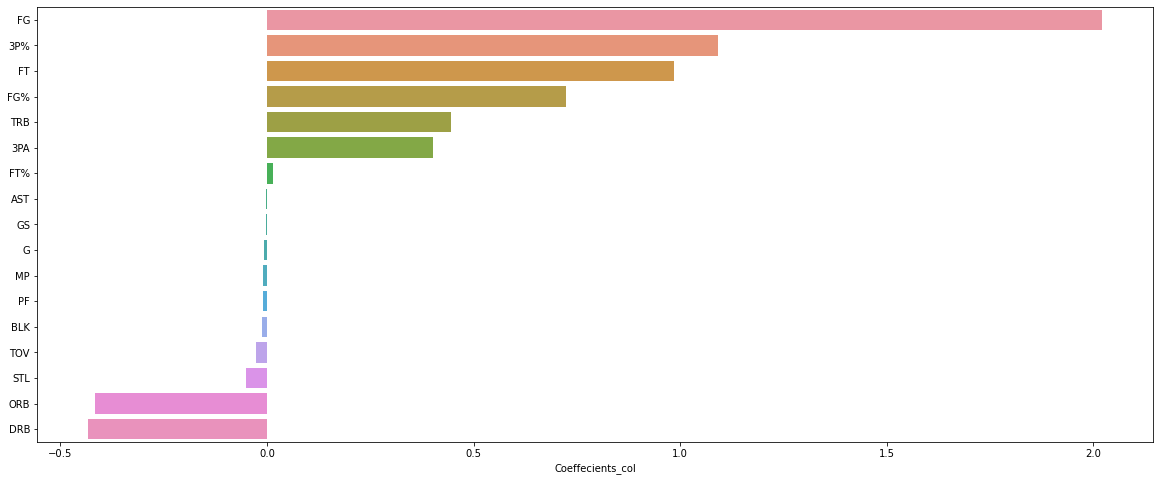

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Coeffecients_col' , y=coef_sort_df.index , data=coef_sort_df )

In [ ]:
df_new_standard['PTS'] = round(df_new_standard['PTS'])
df_new_standard['PTS']

C:\Users\AMIRHO~1\AppData\Local\Temp/ipykernel_2484/2321619478.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new_standard['PTS'] = round(df_new_standard['PTS'])


0       6.0
1      23.0
2       4.0
3       8.0
4       4.0
       ... 
453    22.0
457     7.0
458     5.0
460    24.0
461     3.0
Name: PTS, Length: 338, dtype: float64

In [ ]:
df_new_standard['PTS']

0       6.0
1      23.0
2       4.0
3       8.0
4       4.0
       ... 
453    22.0
457     7.0
458     5.0
460    24.0
461     3.0
Name: PTS, Length: 338, dtype: float64

# Creat model_2 ( ANN )

In [28]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

In [30]:
model.compile(optimizer = 'rmsprop' , loss = 'mse' , metrics = ['mae'])
model.fit(X_train , y_train , batch_size=16 , epochs=30)

Epoch 1/30

17/17 [==============================] - 1s 4ms/step - loss: 0.9788 - mae: 0.7549

Epoch 2/30

17/17 [==============================] - 0s 4ms/step - loss: 0.8269 - mae: 0.7078

Epoch 3/30

17/17 [==============================] - 0s 5ms/step - loss: 0.8235 - mae: 0.7038

Epoch 4/30

17/17 [==============================] - 0s 4ms/step - loss: 0.6975 - mae: 0.6476

Epoch 5/30

17/17 [==============================] - 0s 3ms/step - loss: 0.7118 - mae: 0.6725

Epoch 6/30

17/17 [==============================] - 0s 3ms/step - loss: 0.6075 - mae: 0.6182

Epoch 7/30

17/17 [==============================] - 0s 3ms/step - loss: 0.5677 - mae: 0.6132

Epoch 8/30

17/17 [==============================] - 0s 4ms/step - loss: 0.5816 - mae: 0.5941

Epoch 9/30

17/17 [==============================] - 0s 4ms/step - loss: 0.4969 - mae: 0.5524

Epoch 10/30

17/17 [==============================] - 0s 4ms/step - loss: 0.4893 - mae: 0.5621

Epoch 11/30

17/17 [=============================

In [31]:
pred = model.predict(X_test)
pred

3/3 [==============================] - 0s 5ms/step


array([[18.945135 ],
       [13.277627 ],
       [ 5.4319754],
       [ 7.788538 ],
       [ 7.9955034],
       [18.82587  ],
       [ 0.8794167],
       [ 6.473003 ],
       [18.086466 ],
       [28.422    ],
       [ 1.9696839],
       [ 6.0299444],
       [13.525229 ],
       [30.477938 ],
       [ 3.2982533],
       [16.017815 ],
       [18.81771  ],
       [11.50132  ],
       [ 4.3429585],
       [ 2.0171804],
       [ 3.6492538],
       [ 2.1945639],
       [ 8.099124 ],
       [12.335427 ],
       [10.451436 ],
       [ 3.6963325],
       [ 6.337981 ],
       [ 8.647693 ],
       [ 4.804897 ],
       [20.652311 ],
       [21.70249  ],
       [17.642729 ],
       [ 1.8522925],
       [ 6.335822 ],
       [12.115075 ],
       [ 5.2403026],
       [ 6.61602  ],
       [ 9.515033 ],
       [29.839214 ],
       [10.641078 ],
       [11.354202 ],
       [ 3.6842484],
       [ 5.305867 ],
       [ 2.4653175],
       [ 6.137641 ],
       [ 3.0006056],
       [ 7.78726  ],
       [11.19

In [32]:
y_test

237    18.8
54     14.1
335     4.7
90      8.1
250     8.0
       ... 
216     8.8
342     4.4
96      5.4
144     2.0
428    16.8
Name: PTS, Length: 68, dtype: float64

In [33]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(y_test,pred))

0.3375749731765073

0.1872490027559138


In [44]:
data1 = pd.DataFrame(np.array([y_test]).reshape(68,1),columns=['y_test'])
data2 = pd.DataFrame(np.array([pred]).reshape(68,1),columns=['pred'])

In [49]:
data = data1.join(data2)

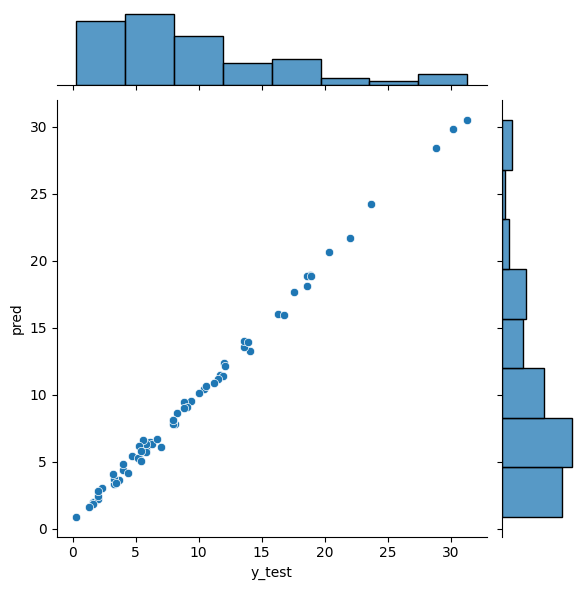

In [50]:
sns.jointplot(data=data , x='y_test' , y='pred')

Text(0, 0.5, 'label')

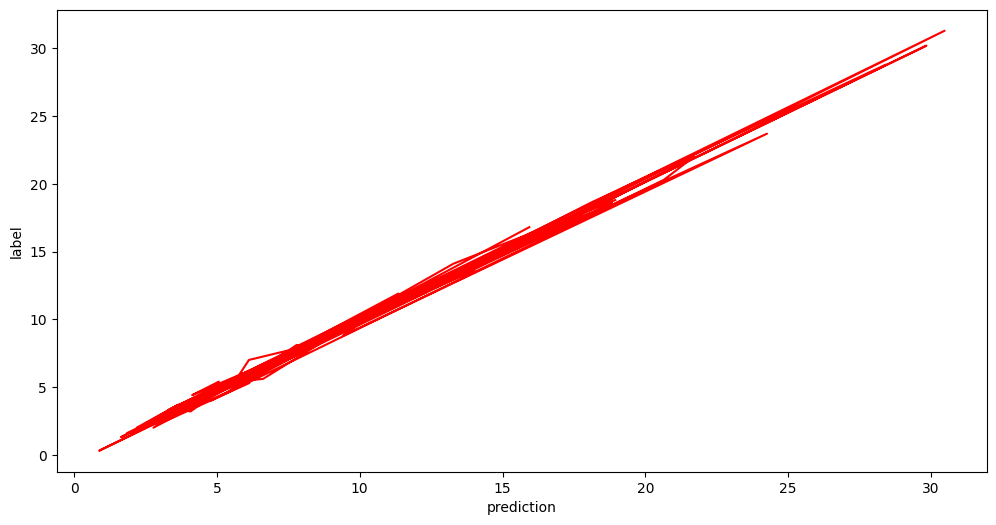

In [54]:
plt.figure(figsize=(12,6))
plt.plot(data['pred'],data['y_test'] ,c='red')
plt.xlabel('prediction')
plt.ylabel('label')